In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as conn
import numpy as np

db = conn.connect(host = "localhost",
                  username = 'prakash_tejwani',
                  password = 'Tejwani@129',
                  database = "ecommerce")
cur = db.cursor()


# List  all unique cities  where customers are Located.  


In [12]:
query = """ select distinct(customer_city) from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

#  Count the number of orders placed in 2017.

In [24]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)
data = cur.fetchall()

"total orders placed in 2017 are ", data[0][0]

('total orders placed in 2017 are ', 45101)

# Find the total sales per category.

In [6]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value), 2) sales 
from products join order_items 
on products.product_id = order_items.product_id 
join payments 
on payments.order_id = order_items.order_id 
group by category """

cur.execute(query)
data = cur.fetchall()

data

df = pd.DataFrame(data, columns = ["Category", "Sales"])

df

,Category,Sales
0,PERFUMERY,2026954.64
1,FURNITURE DECORATION,5720705.57
2,TELEPHONY,1947528.20
3,BED TABLE BATH,6850214.68
4,AUTOMOTIVE,3409177.32
...,...,...
69,CDS MUSIC DVDS,4797.72
70,LA CUISINE,11654.12
71,FASHION CHILDREN'S CLOTHING,3142.68
72,PC GAMER,8697.72


# Calculate the percentage of orders that were paid in installments.

In [15]:
query = """ select 
(sum(case when payment_installments >= 1 then 1 else 0 end)) / count(*) * 100 
from payments"""

cur.execute(query)
data = cur.fetchall()

data

# df = pd.DataFrame(data)

# df

[(Decimal('99.9981'),)]

# Count the number of customers from each state

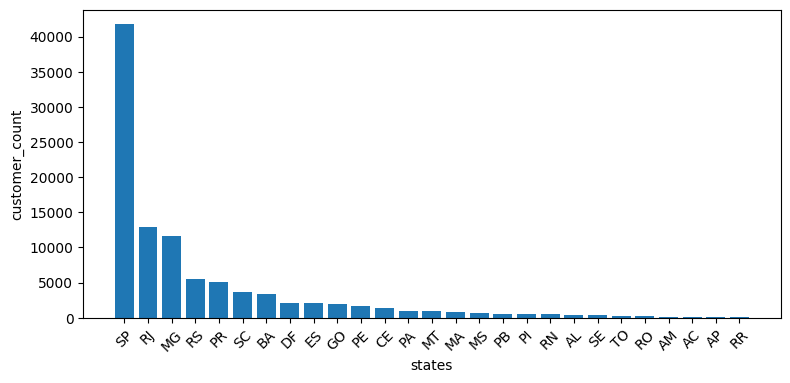

In [49]:
query = """ select customer_state, count(customer_id) from customers group by customer_state"""

cur.execute(query)
data = cur.fetchall()

data

df = pd.DataFrame(data, columns = ["State", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)
plt.figure(figsize = (9,4))
plt.bar(df["State"], df["customer_count"])
plt.xticks(rotation = 45)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.show()

# df

# Calculate number of orders per month in 2018

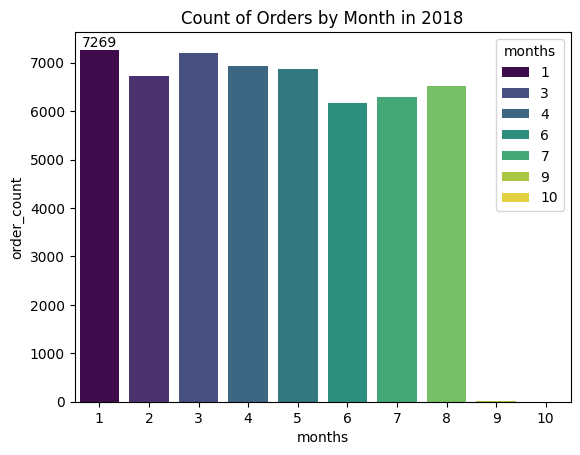

In [55]:
query = """ select MONTH(order_purchase_timestamp), count(order_id) 
from orders 
where 
    year(order_purchase_timestamp) = 2018 
group by 
    month(order_purchase_timestamp)
order by 
    month(order_purchase_timestamp)"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])

ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, palette = "viridis", hue = df["months"])
# plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Month in 2018")

plt.show()
# df

# Find the average number of products per order, grouped by customer city.

In [64]:
query = """ with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc 
from orders join order_items 
on orders.order_id = order_items.order_id 
group by orders.order_id, orders.customer_id) 

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders 
from customers join count_per_order 
on customers.customer_id = count_per_order.customer_id 
group by customers.customer_city"""

cur.execute(query)
data = cur.fetchall()


# data

df = pd.DataFrame(data, columns = ["customer_city", "average orders per order"])
df.head(5)

,customer_city,average orders per order
0,sao paulo,2.31
1,sao jose dos campos,2.28
2,porto alegre,2.35
3,indaial,2.23
4,treze tilias,2.55


# Calculate the percentage of total revenue contributed by each product category.

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\3355764481.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Product Category", y="Percentage of Revenue", palette='viridis')


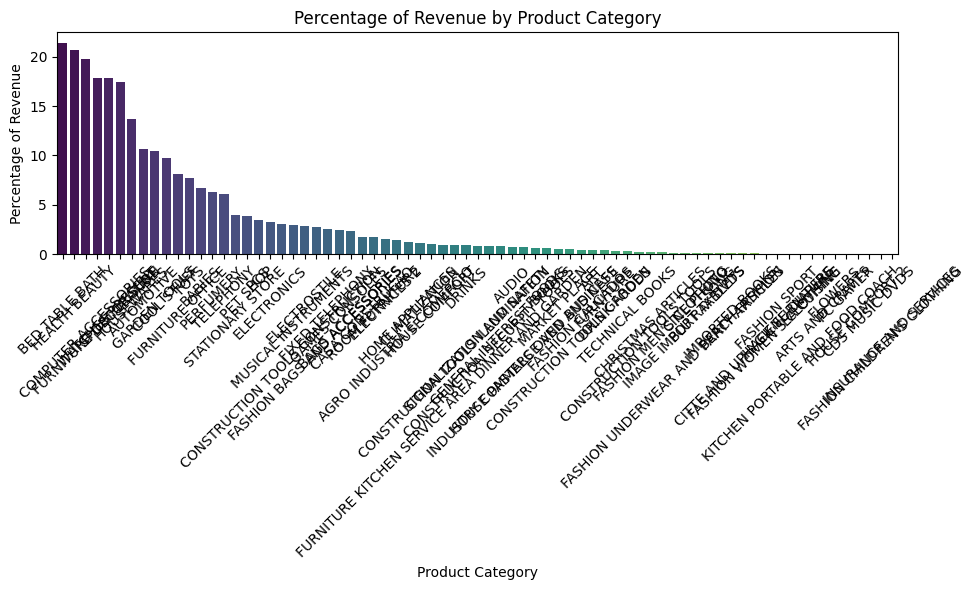

In [79]:
query = """ select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100, 2) sales 
from products join order_items 
on products.product_id = order_items.product_id 
join payments 
on payments.order_id = order_items.order_id 
group by category order by sales desc"""

cur.execute(query)
data = cur.fetchall()

# data


df = pd.DataFrame(data, columns = ["Product Category", "Percentage of Revenue"])
# df

# plt.bar(df["Product Category"], df["Percentage of Revenue"])
# plt.show()

# Set the figure size
plt.figure(figsize=(10,6))

# Create the bar plot
sns.barplot(data=df, x="Product Category", y="Percentage of Revenue", palette='viridis')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Percentage of Revenue')
plt.title('Percentage of Revenue by Product Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Identify the correlation between product price and the number of times a product has been purchased.

In [25]:
query = """select products.product_category, 
count(order_items.product_id), round(avg(order_items.price), 2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()

# data
df = pd.DataFrame(data, columns = ["Product Category", "order_count", "price"])
df

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1, arr2])

print("The correlation between price and number of times a product has been purchased : ", a[0][1])

The correlation between price and number of times a product has been purchased :  -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

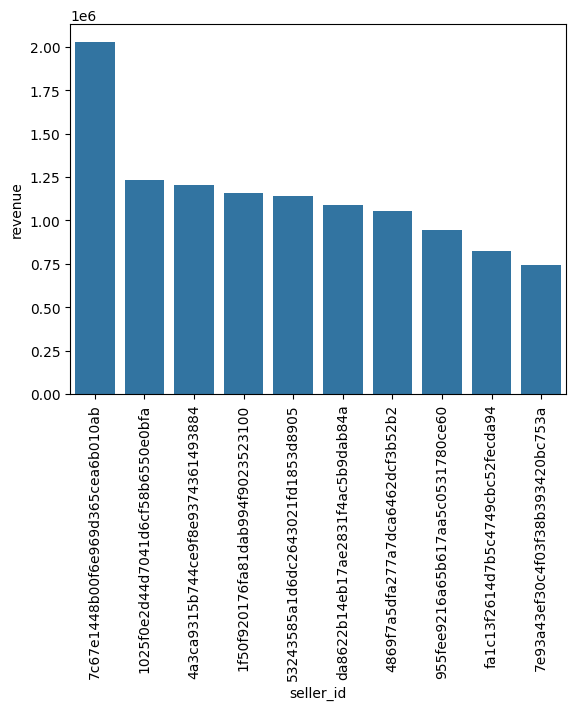

In [38]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id, round(sum(payments.payment_value), 2) revenue
from payments join order_items 
on order_items.order_id = payments.order_id
group by order_items.seller_id ) as a
"""



cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])

df = df.head(10)
sns.barplot(data = df, x = "seller_id", y = "revenue")
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [73]:
query = """ select customer_id, order_purchase_timestamp, payment, 
avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg 
from 
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from orders join payments 
on orders.order_id = payments.order_id) as a 
where customer_id like '%1341' order by customer_id
"""



cur.execute(query)
data = cur.fetchall()

# data

df = pd.DataFrame(data, columns = ['customer id', 'order purchase timestamp', 'payment', 'moving avg'])
# df.head(100)

df

,customer id,order purchase timestamp,payment,moving avg
0,96d1698c15c103bd2aa8b2d3cf511341,2018-08-17 18:21:02,57.39,57.389999
1,96d1698c15c103bd2aa8b2d3cf511341,2018-08-17 18:21:02,57.39,57.389999
2,9d3247c9ba072a69095e08c07dfd1341,2018-06-04 19:51:43,111.87,111.870003
3,9d3247c9ba072a69095e08c07dfd1341,2018-06-04 19:51:43,111.87,111.870003
4,da435fe071a456868a89dfb068881341,2017-11-22 22:09:21,420.28,420.279999
5,da435fe071a456868a89dfb068881341,2017-11-22 22:09:21,420.28,420.279999
6,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,0.640000
7,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,5.065000
8,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
9,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001


# Calculate the cumulative sales per month for each year

In [92]:
query = """ select years, months, payments,
sum(payments) over(order by years, months) as cumulative_sales from
(select year(orders.order_purchase_timestamp) as years, 
month(orders.order_purchase_timestamp) as months, 
round(sum(payments.payment_value), 2) as payments
from orders join payments
on orders.order_id = payments.order_id 
group by years, months 
order by years, months) as a
"""



cur.execute(query)
data = cur.fetchall()

data

[(2016, 9, 504.48, 504.48),
 (2016, 10, 118180.96, 118685.44),
 (2016, 12, 39.24, 118724.68000000001),
 (2017, 1, 276976.08, 395700.76),
 (2017, 2, 583816.02, 979516.78),
 (2017, 3, 899727.2, 1879243.98),
 (2017, 4, 835576.06, 2714820.04),
 (2017, 5, 1185837.64, 3900657.6799999997),
 (2017, 6, 1022552.76, 4923210.4399999995),
 (2017, 7, 1184765.84, 6107976.279999999),
 (2017, 8, 1348792.64, 7456768.919999999),
 (2017, 9, 1455524.9, 8912293.819999998),
 (2017, 10, 1559355.76, 10471649.579999998),
 (2017, 11, 2389765.6, 12861415.179999998),
 (2017, 12, 1756802.96, 14618218.139999997),
 (2018, 1, 2230008.36, 16848226.499999996),
 (2018, 2, 1984926.68, 18833153.179999996),
 (2018, 3, 2319304.24, 21152457.419999994),
 (2018, 4, 2321570.96, 23474028.379999995),
 (2018, 5, 2307964.3, 25781992.679999996),
 (2018, 6, 2047761.0, 27829753.679999996),
 (2018, 7, 2133081.5, 29962835.179999996),
 (2018, 8, 2044850.64, 32007685.819999997),
 (2018, 9, 8879.08, 32016564.899999995),
 (2018, 10, 1179.34,

# Calculate the year-over-year growth rate of total sales.

In [102]:
query = """with a as (select year(orders.order_purchase_timestamp) as years, 
round(sum(payments.payment_value), 2) as payments
from orders join payments
on orders.order_id = payments.order_id 
group by years 
order by years)

select years, payments, round((payments - lag(payments,1) over (order by years))/(lag(payments,1) over (order by years))*100,2) from a"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["year", "sales", "yoy % growth"])
df

,year,sales,yoy % growth
0,2016,118724.68,NaN
1,2017,14499493.46,12112.7
2,2018,17399526.10,20.0


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [112]:
query = """
with a as (select customers.customer_id, 
min(orders.order_purchase_timestamp) first_order 
from customers join orders 
on customers.customer_id = orders.customer_id 
group by customers.customer_id), 

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order 
from a join orders 
on orders.customer_id = a.customer_id 
and orders.order_purchase_timestamp > first_order 
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count(distinct a.customer_id) / count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id"""

cur.execute(query) 
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spend the most money in each year.

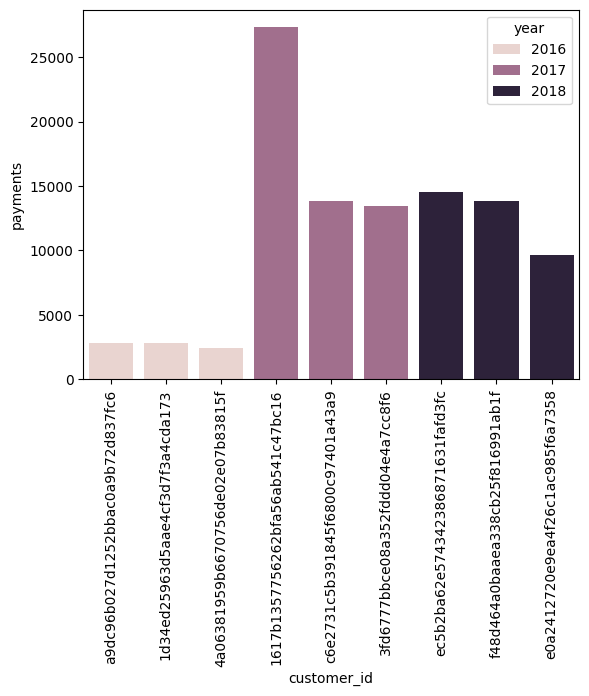

In [140]:
query = """ 
with ranked_customers as (select year(orders.order_purchase_timestamp), 
orders.customer_id, 
sum(payments.payment_value) payment, 
dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as r
from orders join payments 
on orders.order_id = payments.order_id 
group by year(orders.order_purchase_timestamp), 
orders.customer_id )

select * from ranked_customers where r <= 3
"""

cur.execute(query)
data = cur.fetchall()

# data

df = pd.DataFrame(data, columns = ["year", "customer_id", "payments", "rank"])

# df

sns.barplot(x = "customer_id", y = "payments", data = df, hue = "year")
plt.xticks(rotation = 90)
plt.show()